In [39]:
require(ggplot2)
require(ggridges)
require(viridis)
for (cell in c(2, 4, 8, 16, 32, 64, 128, 150, 200, 300)) {
    for (cov in c(10, 100, 250, 500, 750, 1000)) {
        for (p in seq(0.5, 0.95, 0.05)) {
            all_df = NULL
            for (obs in c(1, 3, 5, 10, 20)) {
                p_dist = lapply(1:10000, function(x) {
                    est_p = rbinom(obs, cov, p)/cov
                    return(mean(est_p))
                    })
                #print(p_dist[[1]])
                temp = data.frame(p=unlist(p_dist), obs_time=obs, true_p=p)
                #print(head(temp))
                if (is.null(all_df)) all_df = temp
                else all_df = rbind(all_df, temp)
            }
            all_df[,'obs_time'] <- factor(all_df[,'obs_time'])
            print(head(all_df))
            g <- ggplot(all_df, aes(x=p, y=obs_time, fill=0.5-abs(0.5-stat(ecdf))))+
            stat_density_ridges(geom='density_ridges_gradient', calc_ecdf=TRUE)+scale_fill_viridis_c(name='Tail probability', direction=-1)+geom_vline(xintercept = p)
            png(paste0('sim_est_p_', cell, '_', p, '_', cov, '.png'))
            plot(g)
            dev.off()
        }
    }
    break
}

    p obs_time true_p
1 0.8        1    0.5
2 0.6        1    0.5
3 0.5        1    0.5
4 0.4        1    0.5
5 0.7        1    0.5
6 0.6        1    0.5


Picking joint bandwidth of 0.0109



    p obs_time true_p
1 0.5        1   0.55
2 0.7        1   0.55
3 0.5        1   0.55
4 0.5        1   0.55
5 0.5        1   0.55
6 0.5        1   0.55


Picking joint bandwidth of 0.0111



    p obs_time true_p
1 0.6        1    0.6
2 0.3        1    0.6
3 0.4        1    0.6
4 0.5        1    0.6
5 0.4        1    0.6
6 0.7        1    0.6


Picking joint bandwidth of 0.0108



    p obs_time true_p
1 0.6        1   0.65
2 0.6        1   0.65
3 0.8        1   0.65
4 0.4        1   0.65
5 0.7        1   0.65
6 0.5        1   0.65


Picking joint bandwidth of 0.0106



    p obs_time true_p
1 0.6        1    0.7
2 0.7        1    0.7
3 0.8        1    0.7
4 0.9        1    0.7
5 0.3        1    0.7
6 0.6        1    0.7


Picking joint bandwidth of 0.0104



    p obs_time true_p
1 0.7        1   0.75
2 1.0        1   0.75
3 0.9        1   0.75
4 0.6        1   0.75
5 1.0        1   0.75
6 0.8        1   0.75


Picking joint bandwidth of 0.00984



 [1] 0.5 0.5 0.5 1.0 0.5 0.5 1.0 0.0 0.0 1.0
 [1] 1.00 0.25 0.25 0.25 0.25 0.00 0.50 0.25 0.25 0.50
 [1] 0.750 0.250 0.750 0.500 0.375 0.750 0.875 0.625 0.625 0.375
 [1] 0.5000 0.4375 0.4375 0.1250 0.5000 0.6250 0.6250 0.5625 0.4375 0.5625
 [1] 0.65625 0.62500 0.34375 0.56250 0.40625 0.43750 0.53125 0.43750 0.65625
[10] 0.53125
 [1] 0.468750 0.484375 0.375000 0.406250 0.421875 0.484375 0.500000 0.421875
 [9] 0.500000 0.406250
 [1] 0.499632 0.499568 0.499857 0.499725 0.500212 0.499616 0.500995 0.500175
 [9] 0.501317 0.500828
  value cell
1   0.5    2
2   0.5    2
3   0.5    2
4   1.0    2
5   0.5    2
6   0.5    2


Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.

Picking joint bandwidth of 0.021



png 
  2

Picking joint bandwidth of 0.021



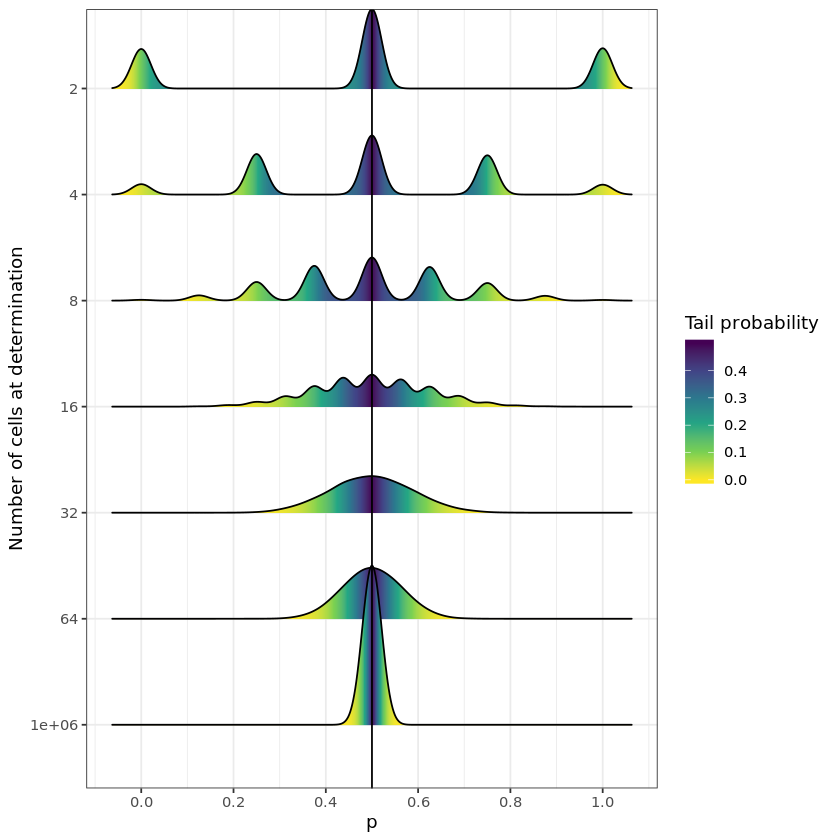

In [12]:

#plot(0:2, dbinom(c(0, 1, 2), 2, 0.5)/)
pdf <- NULL
max_cell = 1000000
for (cnum in c(2, 4, 8, 16, 32, 64, max_cell)) {
    dist <- rbinom(10000, cnum, 0.5)/cnum
    print(dist[1:10])
#     dist <- cut(dist, breaks=seq(0, 1, 0.1), labels=seq(0, 0.9, 0.1), lowest.include=TRUE)
    hist <- as.vector(table(dist))
    if (is.null(pdf)) pdf <- data.frame(value=dist, cell=cnum)
    else pdf <- rbind(pdf, data.frame(value=dist, cell=cnum))
}
pdf[,'cell'] <- factor(pdf[,'cell'], level=c(max_cell, '...', 64, 32, 16, 8, 4, 2))
print(head(pdf))
require(ggplot2)
require(ggridges)
require(viridis)
g <- ggplot(pdf, aes(x=value, y=cell, fill=0.5-abs(0.5-stat(ecdf))))+xlab("p")+ylab("Number of cells at determination")+
stat_density_ridges(geom='density_ridges_gradient', calc_ecdf=TRUE, scale=1.5)+scale_fill_viridis_c(name='Tail probability', direction=-1)+geom_vline(xintercept = 0.5)+
xlim(0.05, 1.05)+theme_bw()+scale_x_continuous(breaks=seq(0,1,0.2))
pdf(paste0('sim_binom_cell_lin.pdf'))
plot(g)
dev.off()
plot(g)